# Original ligands

In [1]:
%load_ext autoreload
%autoreload 2

Install `klifs_utils` library for easy access to the KLIFS API (for installation change the following cell from "Raw" to "Code").

In [2]:
from pathlib import Path

import pandas as pd
from rdkit.Chem import PandasTools

import klifs_utils
from util import get_original_ligands

In [3]:
# Needed to display ROMol images in DataFrames
PandasTools.RenderImagesInAllDataFrames(images=True)

In [4]:
PATH_DATA = Path('.') / '..' / 'data'

## Aim of this notebook

Based on the fragment library, get all ligands from which these fragments originated from ("original ligands" from KLIFS dataset).

## Load fragment library

In [5]:
fragment_library_concat = pd.read_csv(PATH_DATA / 'fragment_library' / 'fragment_library.csv')
PandasTools.AddMoleculeColumnToFrame(fragment_library_concat, 'smiles')

(7486, 13)


,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,subpocket,atom_subpockets,atom_environments,smiles,smiles_dummy_atoms,ROMol
0,AAK1,NAK,Other,5l4q,LKB,B,A,AP,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP F...,16 16 16 16 16 16 16 16 16 16 16 16 16 5 5 na na,Nc1c[nH]c2ncccc12,[11*]c1cnc2[nH]cc(N[27*])c2c1,
1,AAK1,NAK,Other,5te0,XIN,,A,AP,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP A...,7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 ...,N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1,[12*]N/C(=C1\C(=O)Nc2cc([20*])ccc21)c1ccccc1,

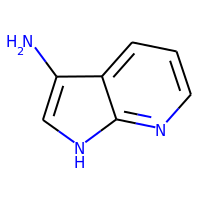
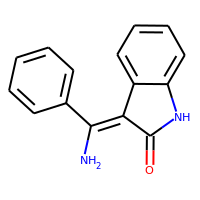

In [6]:
print(fragment_library_concat.shape)
fragment_library_concat.head(2)

## Get original ligands from fragment library

Group fragment library by ligand: For each ligand collect the following data:

- PDB complex and ligand ID, alternate model, chain, and aC-helix conformation for the KLIFS structure that the ligand was co-crystallized with
- Kinase name, family, and group of the kinase the ligand was co-crystallized with
- Subpockets occupied by the ligand
- Ligand RDKit molecule (remote KLIFS access) and SMILES (generated from RDKit molecule)

In [7]:
# Takes a couple of minutes (queries KLIFS database)
original_ligands = get_original_ligands(fragment_library_concat)

(2553, 11)


,complex_pdb,ligand_pdb,subpocket,kinase,family,group,alt,chain,aC_helix,ROMol,smiles
0,1a9u,SB2,"[AP, GA, B2]",p38a,MAPK,CMGC,,A,out-like,,C[S@](=O)c1ccc(-c2nc(-c3ccc(F)cc3)c(-c3ccncc3)...
1,1agw,SU2,"[AP, SE]",FGFR1,FGFR,TK,B,B,out-like,,O=CN1CCN(c2ccc(C[C@@H]3C(=O)Nc4ccccc43)cc2)CC1

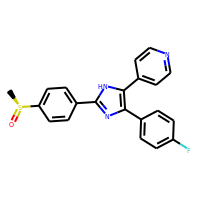
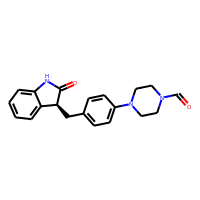

In [8]:
print(original_ligands.shape)
original_ligands.head(2)

## Save original ligands to file

In [9]:
original_ligands.drop('ROMol', axis=1).to_csv(PATH_DATA / 'fragment_library' / 'original_ligands.csv', index=False)